#Customer Segmentation Analysis

Tujuan utama dari proyek ini adalah untuk mengelompokkan pelanggan menjadi beberapa kelompok pelanggan berdasarkan kemiripan karakteristiknya sehingga dapat membuat strategi bisnis yang efektif untuk menjaga serta meningkatkan kepuasan pelanggan tersebut.

##Cakupan Proyek

Pada proyek ini kita akan menerapkan dua metode untuk melakukan customer segmentation yaitu RFM analysis dan machine learning model menggunakan algorima K-Means Clustering dengan memanfaatkan nilai RFM dan menggunakan Elbow Method dan Sillouette Method untuk mengoptimalkan jumlah cluster-nya.

## Dataset Dictionary

- Row ID => Unique ID for each row.
- Order ID => Unique Order ID for each Customer.
- Order Date => Order Date of the product.
- Ship Date => Shipping Date of the Product.
- Ship Mode=> Shipping Mode specified by the Customer.
- Customer ID => Unique ID to identify each Customer.
- Customer Name => Name of the Customer.
- Segment => The segment where the Customer belongs.
- Country => Country of residence of the Customer.
- City => City of residence of of the Customer.
- State => State of residence of the Customer.
- Postal Code => Postal Code of every Customer.
- Region => Region where the Customer belong.
- Product ID => Unique ID of the Product.
- Category => Category of the product ordered.
- Sub-Category => Sub-Category of the product ordered.
- Product Name => Name of the Product
- Sales => Sales of the Product.
- Quantity => Quantity of the Product.
- Discount => Discount provided.
- Profit => Profit/Loss incurred.

## Data Wrangling

### Data Gathering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
!kaggle datasets download -d vivek468/superstore-dataset-final
!mkdir -p /project/data
!unzip superstore-dataset-final.zip -d /project/data

Dataset URL: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final
License(s): other
  0% 0.00/550k [00:00<?, ?B/s]
100% 550k/550k [00:00<00:00, 25.3MB/s]
Archive:  superstore-dataset-final.zip
  inflating: /project/data/Sample - Superstore.csv  


In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/project/data/Sample - Superstore.csv', encoding='windows-1252')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Data Cleansing

Kita coba cek jumlah missing value dan duplikasi pada data.

In [4]:
print('Duplicate Data:', df.duplicated().sum(), '\n----------')
print('Missing Value:')
df.isna().sum()

Duplicate Data: 0 
----------
Missing Value:


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


Kemudian coba kita cek kesesuaian tipe data pada setiap kolom/fitur.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Terdapat beberapa feature yang perlu disesuaikan tipe datanya antara lain: Row ID, Order Date, Ship Date, dan Postal Code.

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Row ID'] = df['Row ID'].astype(str)
df['Postal Code'] = df['Postal Code'].astype(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   object        
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   object        
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

### Feature Engineering

Karena kita akan mengidentifikasi pelanggan, kita kelompokkan data yang diperlukan berdasarkan ID pelanggan. Selain feature recency, frequency, dan monetary, kita juga akan menggunakan feature discount agar bisa mengenali perilaku pelanggan lebih dalam.

In [8]:
df["Discount Amount"] = df["Sales"] * df["Discount"]

In [9]:
main_df = df.groupby(by="Customer ID", as_index=False).agg({
    "Order Date": "max",
    "Ship Mode": (lambda x: x.mode()[0]),
    "Segment": (lambda x: x.mode()[0]),
    "Category": (lambda x: x.mode()[0]),
    "Region": (lambda x: x.mode()[0]),
    "Order ID": "nunique",
    "Sales": "sum",
    "Discount Amount": "sum"
})
main_df.head()

,Customer ID,Order Date,Ship Mode,Segment,Category,Region,Order ID,Sales,Discount Amount
0,AA-10315,2017-06-29,Standard Class,Consumer,Office Supplies,Central,5,5563.560,1015.92800
1,AA-10375,2017-12-11,Standard Class,Consumer,Office Supplies,East,9,1056.390,34.54400
2,AA-10480,2017-04-15,Standard Class,Consumer,Office Supplies,Central,4,1790.512,3.11040
3,AA-10645,2017-11-05,Standard Class,Consumer,Furniture,East,6,5086.935,532.18395
4,AB-10015,2016-11-10,First Class,Consumer,Office Supplies,Central,3,886.156,12.26720


In [10]:
main_df.columns = ["customer_id", "last_order_date", "ship_mode", "customer_type", "category","region", "frequency", "monetary", "discount"]
main_df.head(5)

,customer_id,last_order_date,ship_mode,customer_type,category,region,frequency,monetary,discount
0,AA-10315,2017-06-29,Standard Class,Consumer,Office Supplies,Central,5,5563.560,1015.92800
1,AA-10375,2017-12-11,Standard Class,Consumer,Office Supplies,East,9,1056.390,34.54400
2,AA-10480,2017-04-15,Standard Class,Consumer,Office Supplies,Central,4,1790.512,3.11040
3,AA-10645,2017-11-05,Standard Class,Consumer,Furniture,East,6,5086.935,532.18395
4,AB-10015,2016-11-10,First Class,Consumer,Office Supplies,Central,3,886.156,12.26720


In [11]:
# recency

main_df["last_order_date"] = pd.to_datetime(main_df["last_order_date"])
main_df["last_order_date"] = main_df["last_order_date"].dt.date
recent_date = df["Order Date"].dt.date.max()
main_df["recency"] = main_df["last_order_date"].apply(lambda x: (recent_date - x).days)

main_df.head(5)

,customer_id,last_order_date,ship_mode,customer_type,category,region,frequency,monetary,discount,recency
0,AA-10315,2017-06-29,Standard Class,Consumer,Office Supplies,Central,5,5563.560,1015.92800,184
1,AA-10375,2017-12-11,Standard Class,Consumer,Office Supplies,East,9,1056.390,34.54400,19
2,AA-10480,2017-04-15,Standard Class,Consumer,Office Supplies,Central,4,1790.512,3.11040,259
3,AA-10645,2017-11-05,Standard Class,Consumer,Furniture,East,6,5086.935,532.18395,55
4,AB-10015,2016-11-10,First Class,Consumer,Office Supplies,Central,3,886.156,12.26720,415


## EDA

Sebelumnya, mari kita lihat revenue dan profit perbulannya.

In [12]:
perf_df = df.resample('M', on='Order Date').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).rename(columns={'Sales':'Revenue'})
perf_df.head()

,Revenue,Profit
Order Date,,
2014-01-31,14236.895,2450.1907
2014-02-28,4519.892,862.3084
2014-03-31,55691.009,498.7299
2014-04-30,28295.345,3488.8352
2014-05-31,23648.287,2738.7096


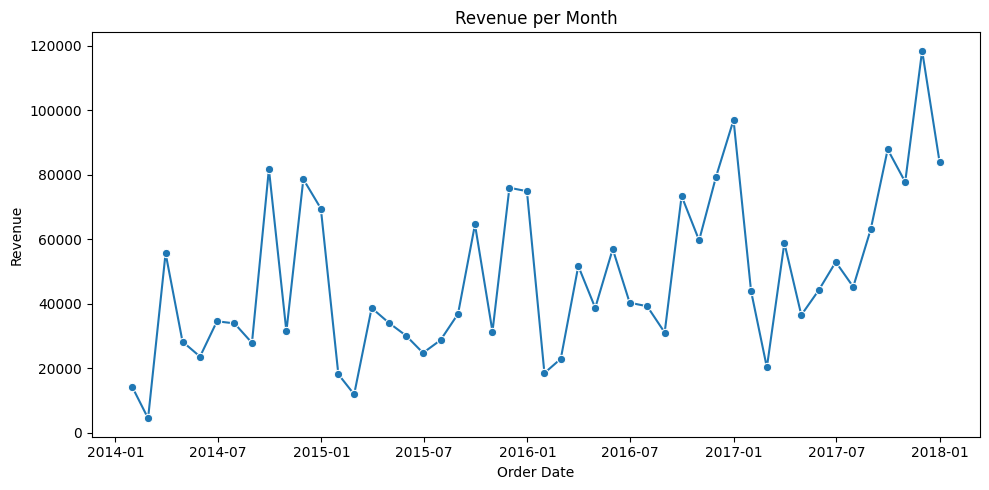

In [13]:
plt.figure(figsize=(10, 5))

sns.lineplot(data=perf_df, x="Order Date", y="Revenue", marker="o")
plt.title("Revenue per Month")
plt.tight_layout()
plt.show()

Grafik garis di atas menunjukkan revenue dari tahun 2014 hingga 2017 yang mana mengalami peningkatan. Setiap tahunnya memiliki pola yang mirip, dengan lonjakkan setiap bulan April, Oktober, dan Desember.

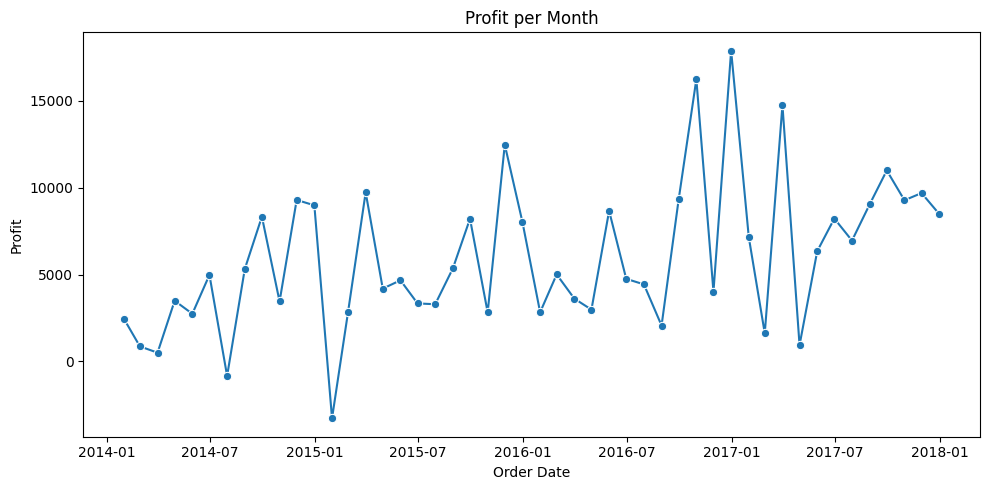

In [14]:
plt.figure(figsize=(10, 5))

sns.lineplot(data=perf_df, x="Order Date", y="Profit", marker="o")
plt.title("Profit per Month")
plt.tight_layout()
plt.show()

Profit terendah terjadi pada bulan februari 2015, dan yang tertinggi pada bulan januari 2017. Namun yang menarik disini, pada bulan-bulan yang revenue nya selalu meningkat setiap tahun tidak selalu memiliki lonjakan profit, mungkin dikarenakan strategi pemasaran yang menerapkan harga diskon atau mungkin terjadi peningkatan biaya operasional atau disebabkan oleh faktor lain, ini perlu dianalisis lebih lanjut. Kemudian pada akhir tahun 2017 juga memiliki profitabilitas yang lesu meskipun revenue yang dihasilkan meningkat signifikan.

Selanjutnya kita eksplorasi data yang telah dikelompokkan berdasarkan customer_id.

In [15]:
main_df.describe(include='all')

,customer_id,last_order_date,ship_mode,customer_type,category,region,frequency,monetary,discount,recency
count,793,793,793,793,793,793,793.000000,793.000000,793.000000,793.000000
unique,793,300,4,3,3,4,NaN,NaN,NaN,NaN
top,AA-10315,2017-12-02,Standard Class,Consumer,Office Supplies,East,NaN,NaN,NaN,NaN
freq,1,14,575,409,704,254,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,6.316520,2896.848500,406.787055,146.802018
std,NaN,NaN,NaN,NaN,NaN,NaN,2.550885,2628.670117,632.372871,186.211051
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,4.833000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,1146.050000,102.691200,30.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,2256.394000,247.915600,75.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,3785.276000,491.433300,183.000000


Kita cek distribusi data numerik nya.

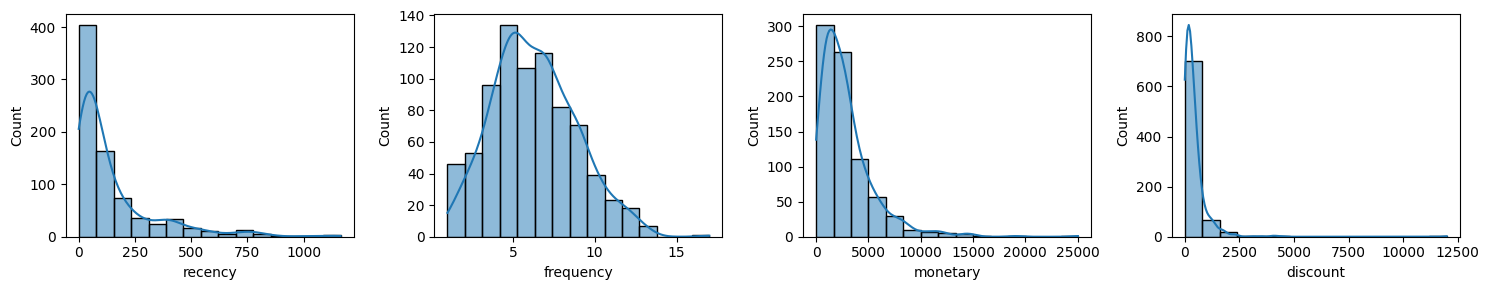

In [16]:
numerical = ["recency", "frequency", "monetary", "discount"]
fig, ax = plt.subplots(1, len(numerical), figsize=(15, 3))
for i, num in enumerate(numerical):
    sns.histplot(data=main_df, x=num, bins=15, kde=True, ax=ax[i])
plt.tight_layout()
plt.show()

Terlihat bahwa selain feature frequency, memiliki jenis distribusi right-skewed. Oleh karena itu akan kita terapkan metode yeo-johnson transformation sebelum melatih model.

Kita coba lihat persebaran datanya berdasarkan tipe pelanggan.

In [17]:
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1,figsize=(10,15))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()

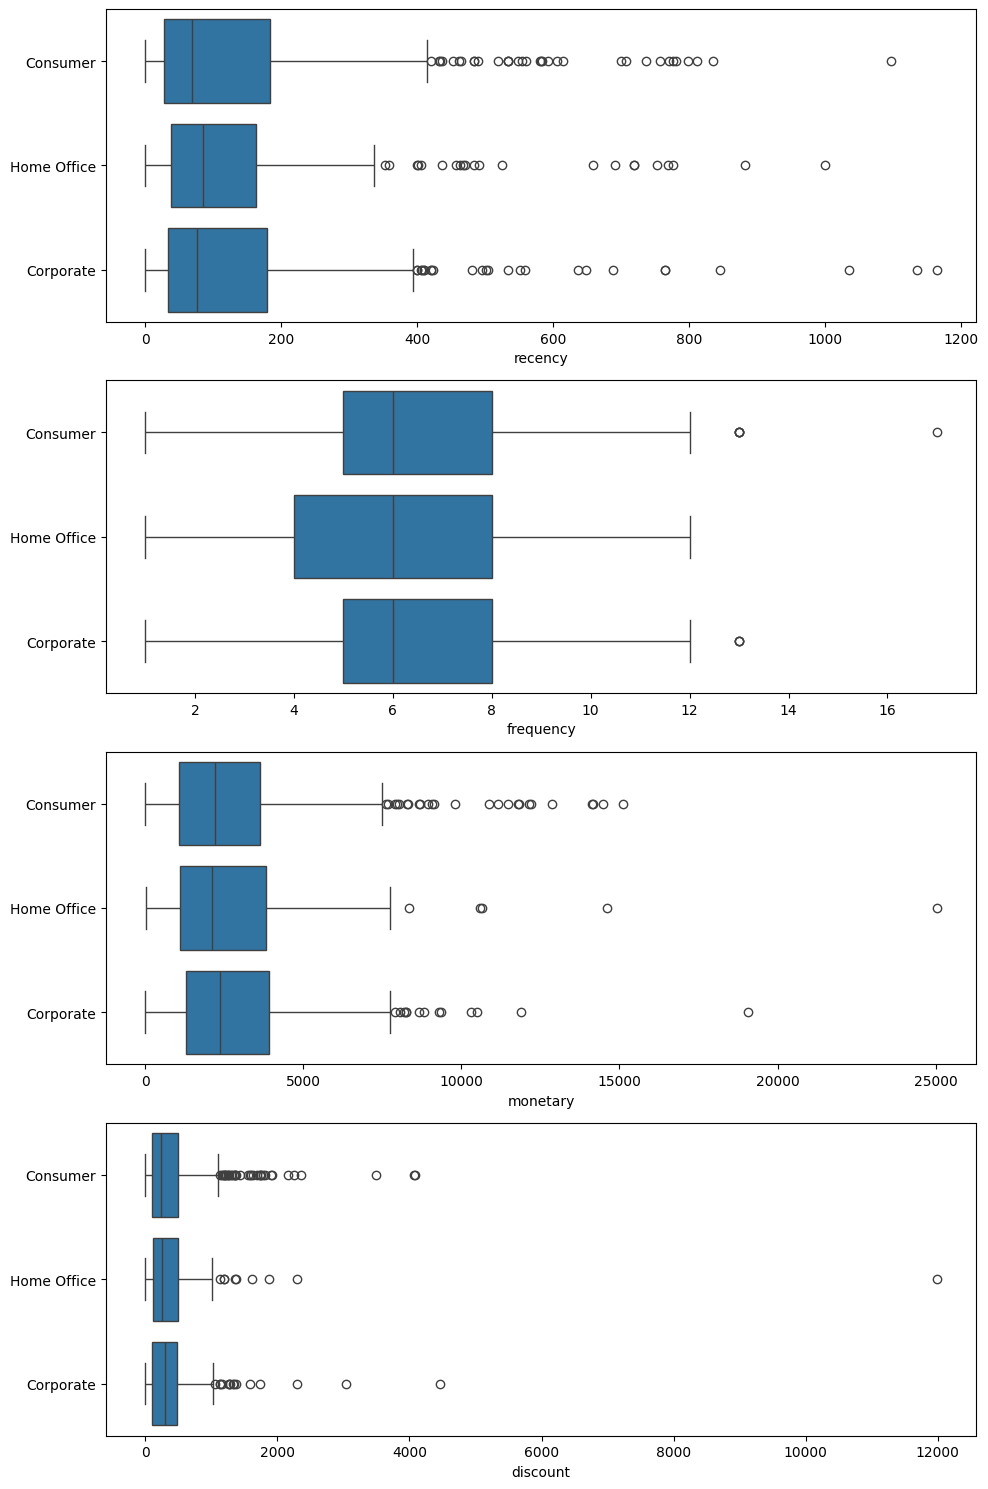

In [18]:
numerical_dis_plot(
    features=numerical,
    df=main_df,
    segment_feature="customer_type")

Tidak terdapat pola yang menarik pada grafik diatas, kita coba kelompokkan berdasarkan wilayahnya.

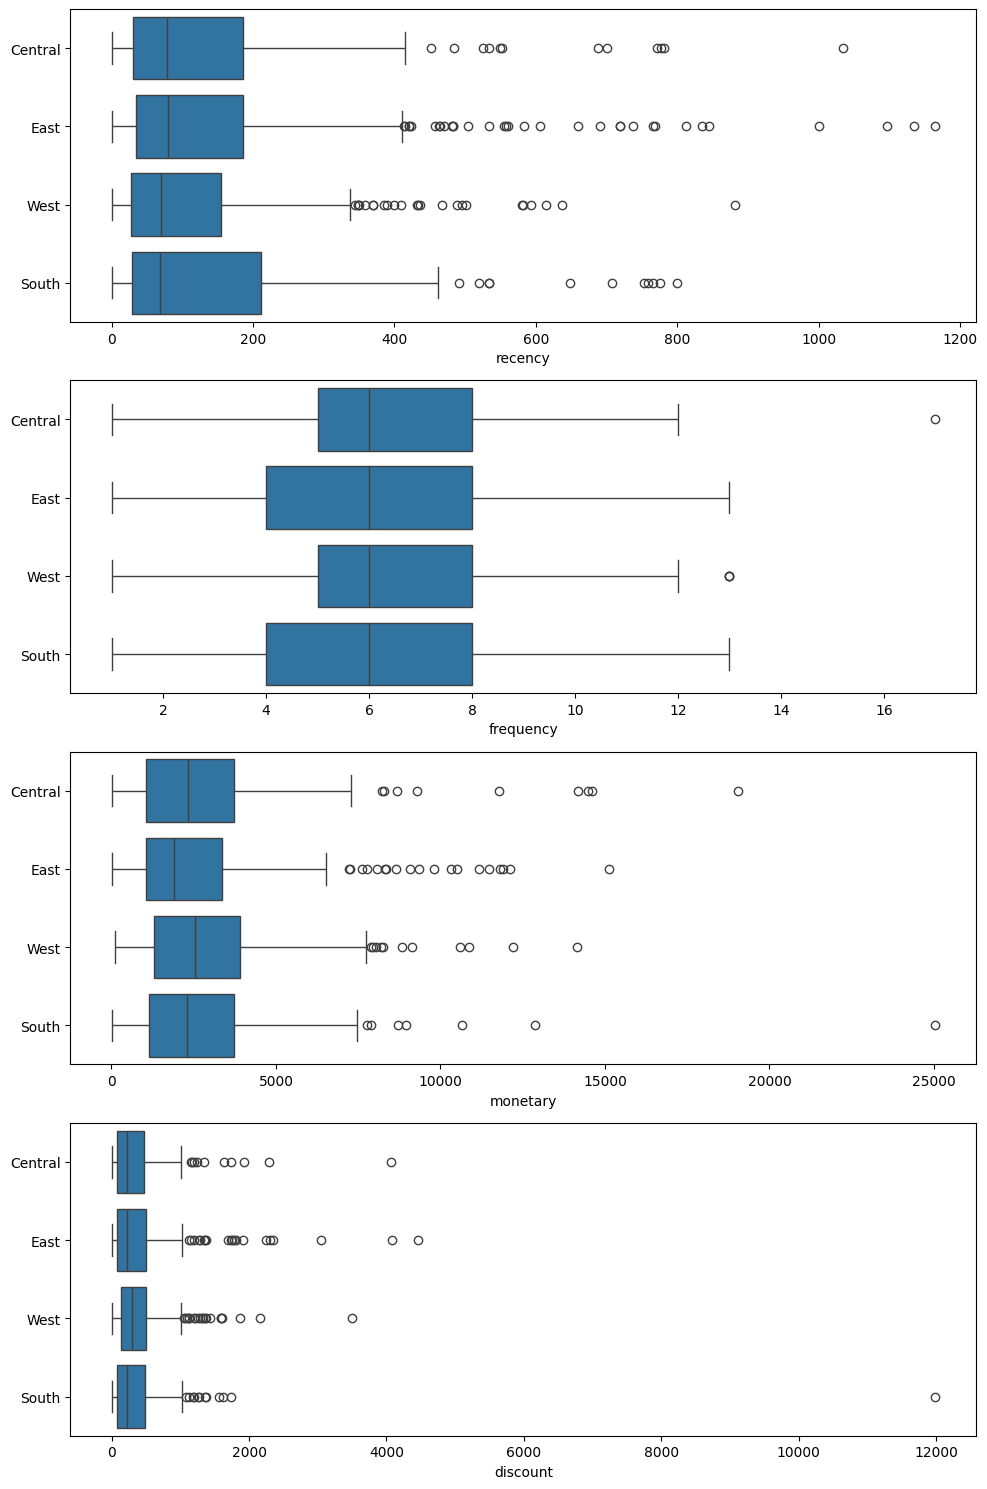

In [19]:
numerical_dis_plot(
    features=numerical,
    df=main_df,
    segment_feature="region"
)

Ternyata juga tidak ada pola yang menarik.

Selanjutnya kita cek juga distribusi data kategorik nya.

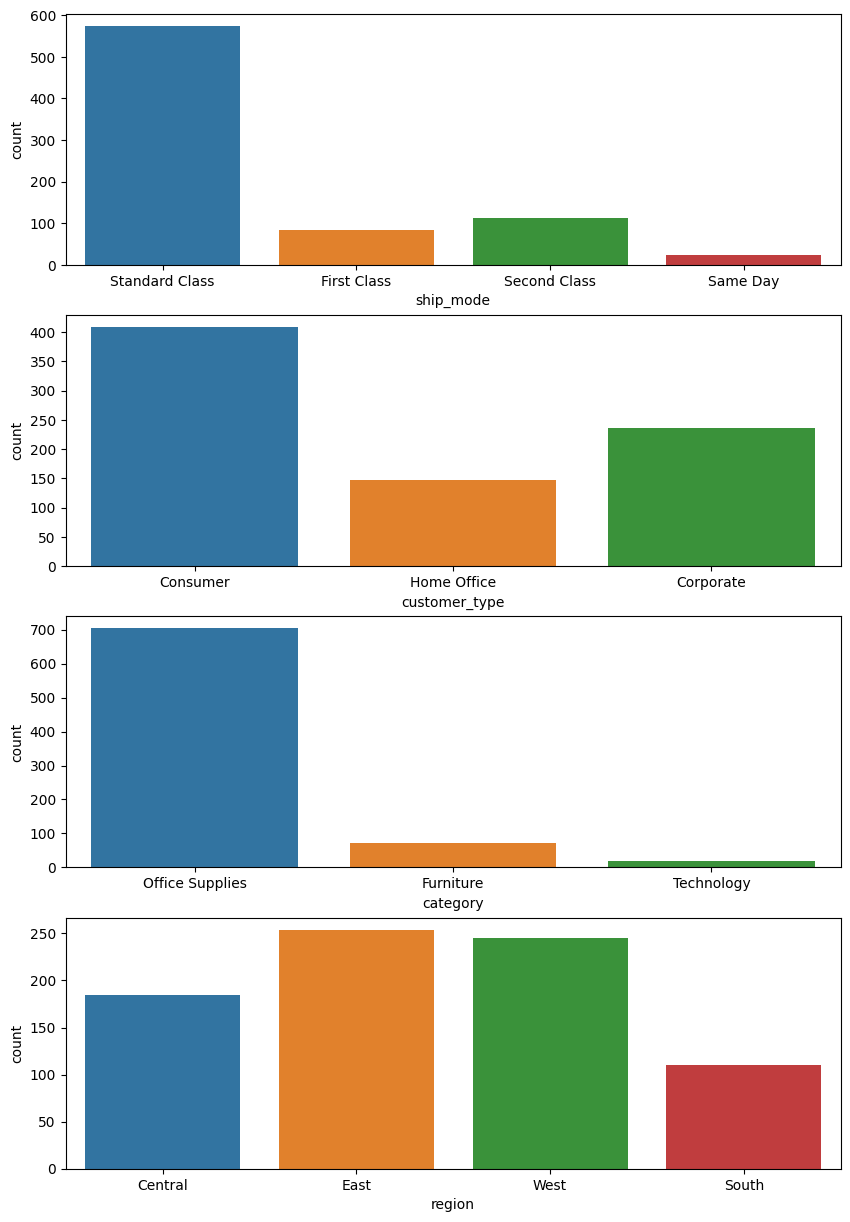

In [20]:
categorical = ["ship_mode", "customer_type", "category", "region"]

fig, ax = plt.subplots(len(categorical), 1,figsize=(10,15))
for i, feature in enumerate(categorical):
  sns.countplot(data=main_df, x=feature, hue=feature, ax=ax[i])
plt.show()

Dari grafik diatas terlihat bahwa pelanggan paling banyak adalah konsumen (consumer), selain itu pelanggan dominan berasal dari wilayah timur dan barat. Kemudian produk yang paling banyak terjual adalah kategori produk peralatan kantor (office supplies), sedangkan jenis pengiriman standard adalah jenis pengiriman yang paling banyak digunakan.

Kita coba kelompokkan berdasarkan tipe pelanggan.

In [21]:
def categorical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1,figsize=(10,15))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, x=segment_feature, hue=feature, ax=ax[i])
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
    plt.tight_layout()
    plt.show()

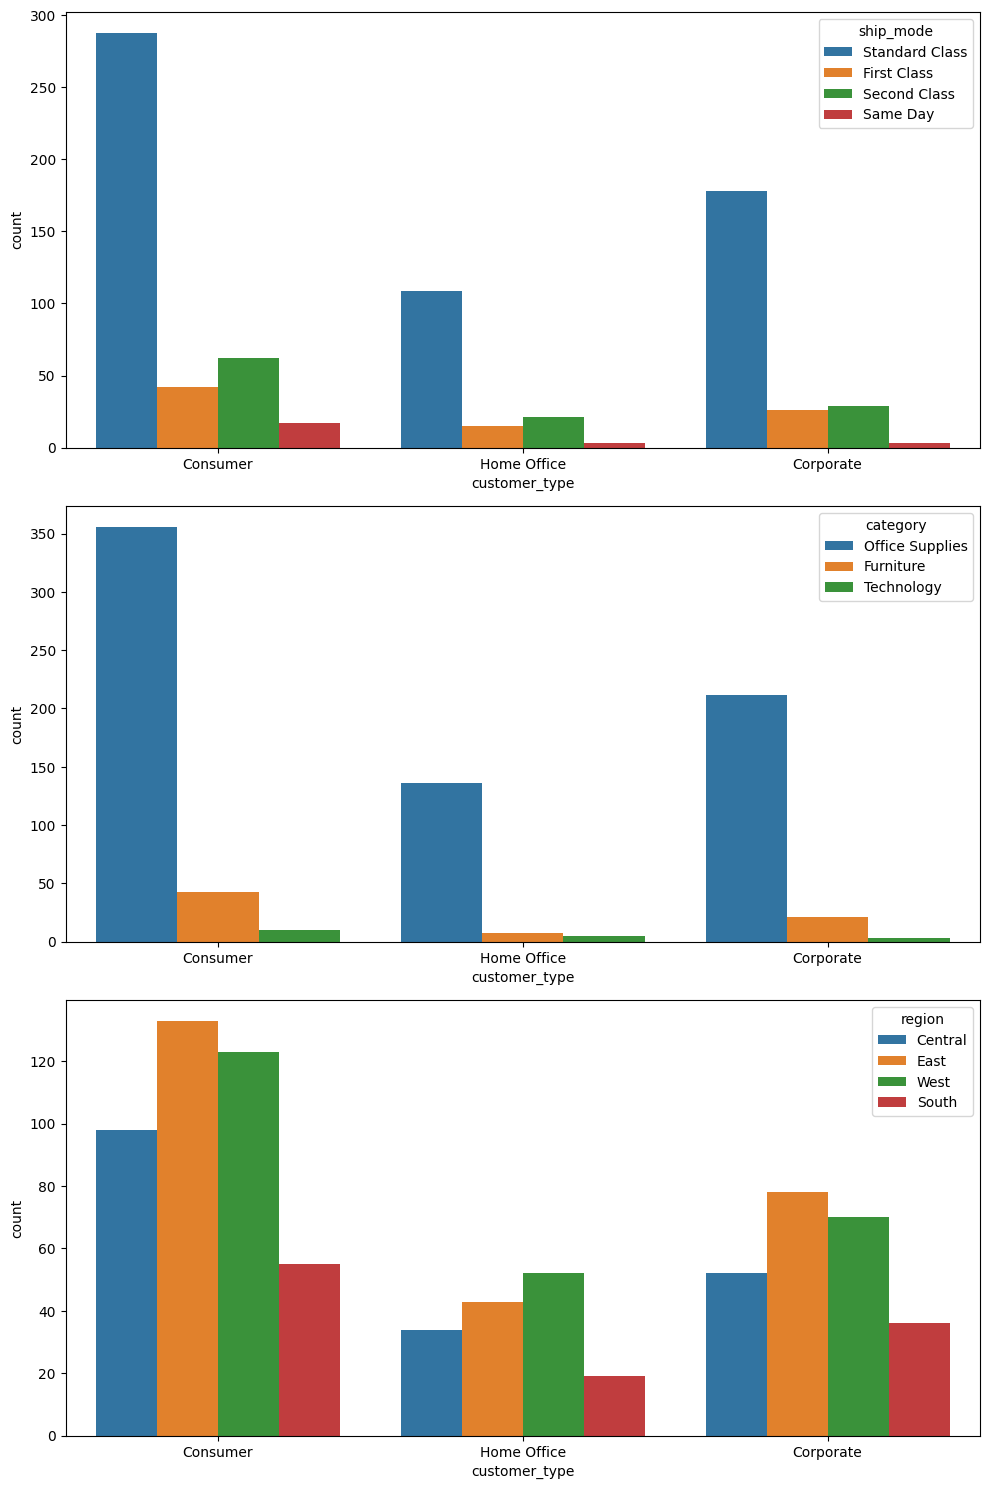

In [22]:
categorical_plot(
    features=["ship_mode", "category", "region"],
    df=main_df,
    segment_feature="customer_type")

Dari grafik diatas tidak terdapat pola yang menarik, hampir semuanya memliki pola yang mirip dan didominasi oleh kelompok mayoritas. Coba kita kelompokkan berdasarkan wilayahnya.

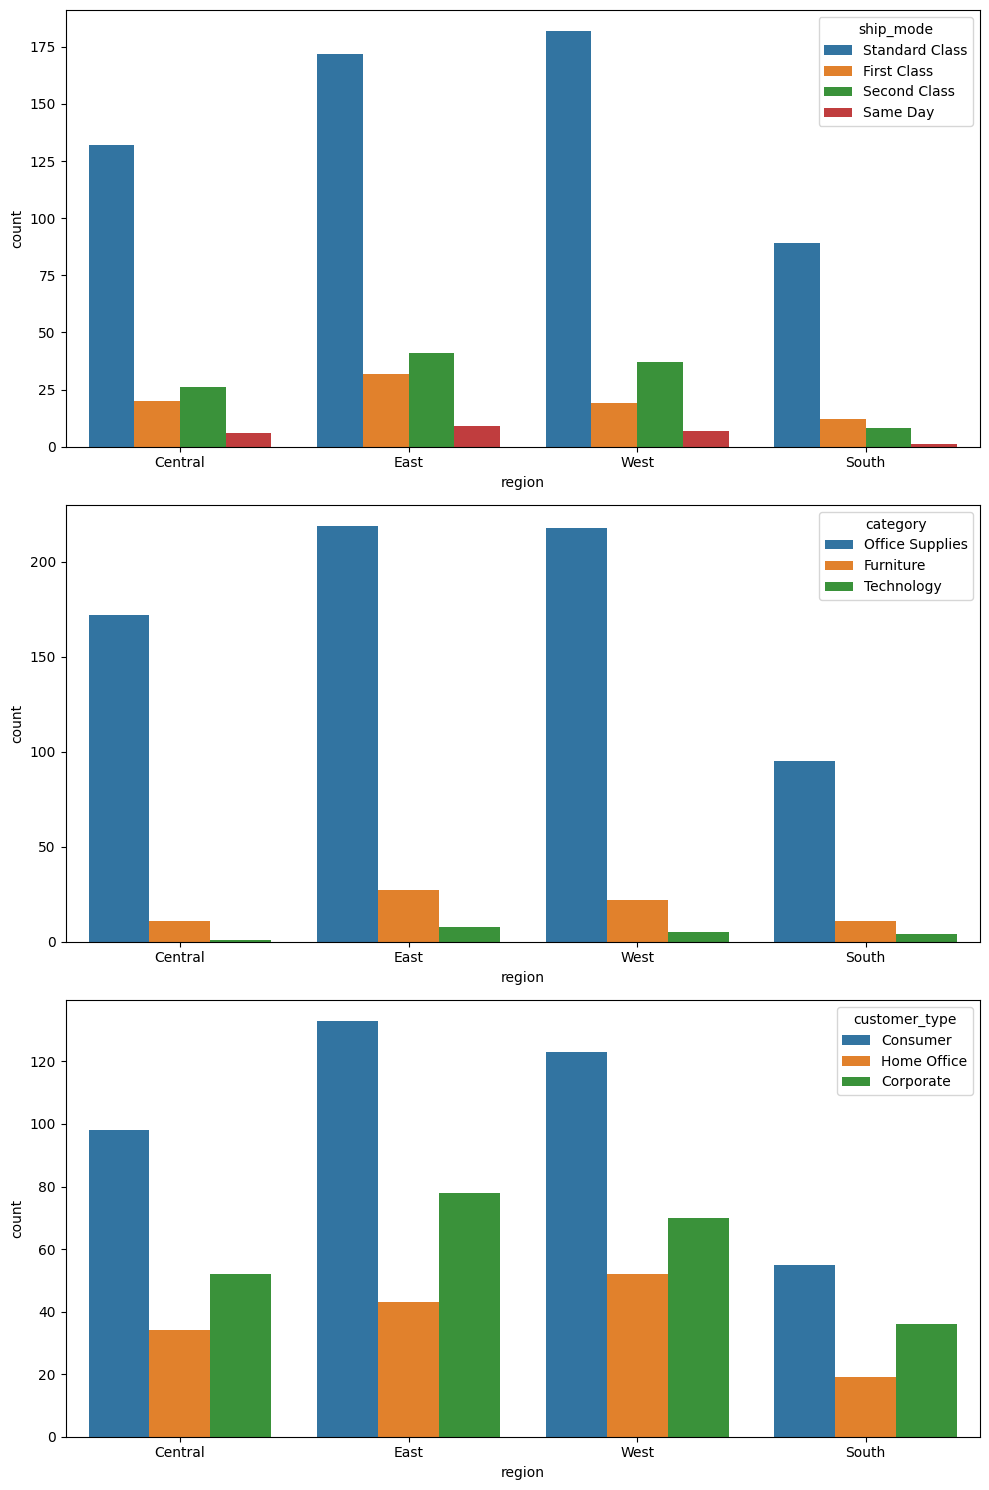

In [23]:
categorical_plot(
    features=["ship_mode", "category", "customer_type"],
    df=main_df,
    segment_feature="region"
)

Grafik diatas juga semuanya memiliki pola yang sama, didominasi kelompok mayoritas.

## RFM Analysis

In [24]:
rfm_df = main_df[["customer_id", "recency", "frequency", "monetary"]]
rfm_df.head()

,customer_id,recency,frequency,monetary
0,AA-10315,184,5,5563.560
1,AA-10375,19,9,1056.390
2,AA-10480,259,4,1790.512
3,AA-10645,55,6,5086.935
4,AB-10015,415,3,886.156


### Scoring

In [25]:
'''
range value 1-5
ratio pembobotan:
    20% dari recency score
    30% dari frequency score
    50% dari monetary score
'''

# Calculate the rank
rfm_df['r_score'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_score'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_score'] = rfm_df['monetary'].rank(ascending=True)

# normalizing the rank
rfm_df['r_score_norm'] = (rfm_df['r_score']/rfm_df['r_score'].max())*100
rfm_df['f_score_norm'] = (rfm_df['f_score']/rfm_df['f_score'].max())*100
rfm_df['m_score_norm'] = (rfm_df['m_score']/rfm_df['m_score'].max())*100

# Calculate the RFM score
rfm_df['RFM_score'] = (0.2*rfm_df['r_score_norm'] + 0.3*rfm_df['f_score_norm'] + 0.5*rfm_df['m_score_norm']) * 0.05
rfm_df = rfm_df.round(2)

rfm_df.head()

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,r_score_norm,f_score_norm,m_score_norm,RFM_score
0,AA-10315,184,5,5563.56,195.5,262.5,702.0,24.70,33.10,88.52,2.96
1,AA-10375,19,9,1056.39,685.5,670.0,182.0,86.61,84.49,22.95,2.71
2,AA-10480,259,4,1790.51,140.0,147.5,323.0,17.69,18.60,40.73,1.47
3,AA-10645,55,6,5086.93,463.5,383.0,679.0,58.56,48.30,85.62,3.45
4,AB-10015,415,3,886.16,71.5,73.0,142.0,9.03,9.21,17.91,0.68


### Segmentasi

Kita kelompokkan pelanggan ke dalam empat kelompok, yaitu top customers, high value customers, medium value customers, dan low value customers.

In [26]:
rfm_df["customer_segment"] = np.where(
    rfm_df["RFM_score"] > 3.75, "Top Customers", (np.where(
        rfm_df["RFM_score"] > 2.5, "High Value Customers", (np.where(
            rfm_df["RFM_score"] > 1.25, "Medium Value Customers", "Low Value Customers",
        ))
    ))
)

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head()

,customer_id,RFM_score,customer_segment
0,AA-10315,2.96,High Value Customers
1,AA-10375,2.71,High Value Customers
2,AA-10480,1.47,Medium Value Customers
3,AA-10645,3.45,High Value Customers
4,AB-10015,0.68,Low Value Customers


### Memvalidasi dan menganalisis hasil segmentasi

In [27]:
result_rfm_df = pd.merge(
    left=main_df,
    right=rfm_df[["customer_id", "RFM_score", "customer_segment"]],
    on="customer_id",
    how="inner"
)
result_rfm_df.head(5)

,customer_id,last_order_date,ship_mode,customer_type,category,region,frequency,monetary,discount,recency,RFM_score,customer_segment
0,AA-10315,2017-06-29,Standard Class,Consumer,Office Supplies,Central,5,5563.560,1015.92800,184,2.96,High Value Customers
1,AA-10375,2017-12-11,Standard Class,Consumer,Office Supplies,East,9,1056.390,34.54400,19,2.71,High Value Customers
2,AA-10480,2017-04-15,Standard Class,Consumer,Office Supplies,Central,4,1790.512,3.11040,259,1.47,Medium Value Customers
3,AA-10645,2017-11-05,Standard Class,Consumer,Furniture,East,6,5086.935,532.18395,55,3.45,High Value Customers
4,AB-10015,2016-11-10,First Class,Consumer,Office Supplies,Central,3,886.156,12.26720,415,0.68,Low Value Customers


In [28]:
result_rfm_df['customer_segment'] = pd.Categorical(result_rfm_df['customer_segment'], [
   "Top Customers" ,"High Value Customers", "Medium Value Customers", "Low Value Customers"
])

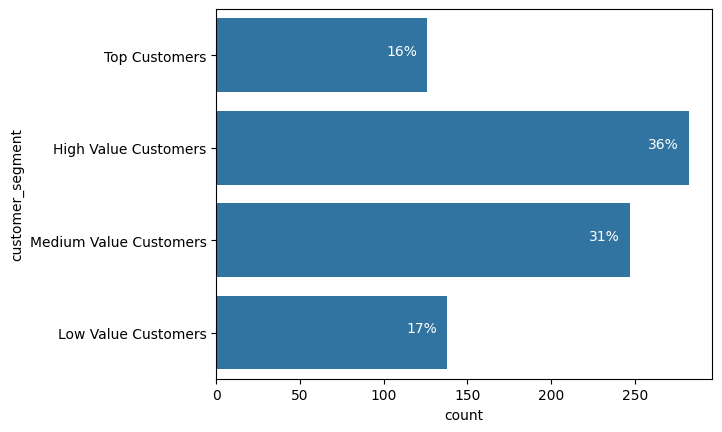

In [29]:
ax = sns.countplot(data=result_rfm_df, y='customer_segment')
for p in ax.patches:
    ax.text(p.get_width() - 15,
            p.get_y() + p.get_height()/2,
            f'{100 * p.get_width() / len(result_rfm_df):.0f}%',
            ha="center",
            color='white')
plt.show()

Strategi apa yang harus dilakukan untuk mengubah High Value Customers menjadi Top Customers?

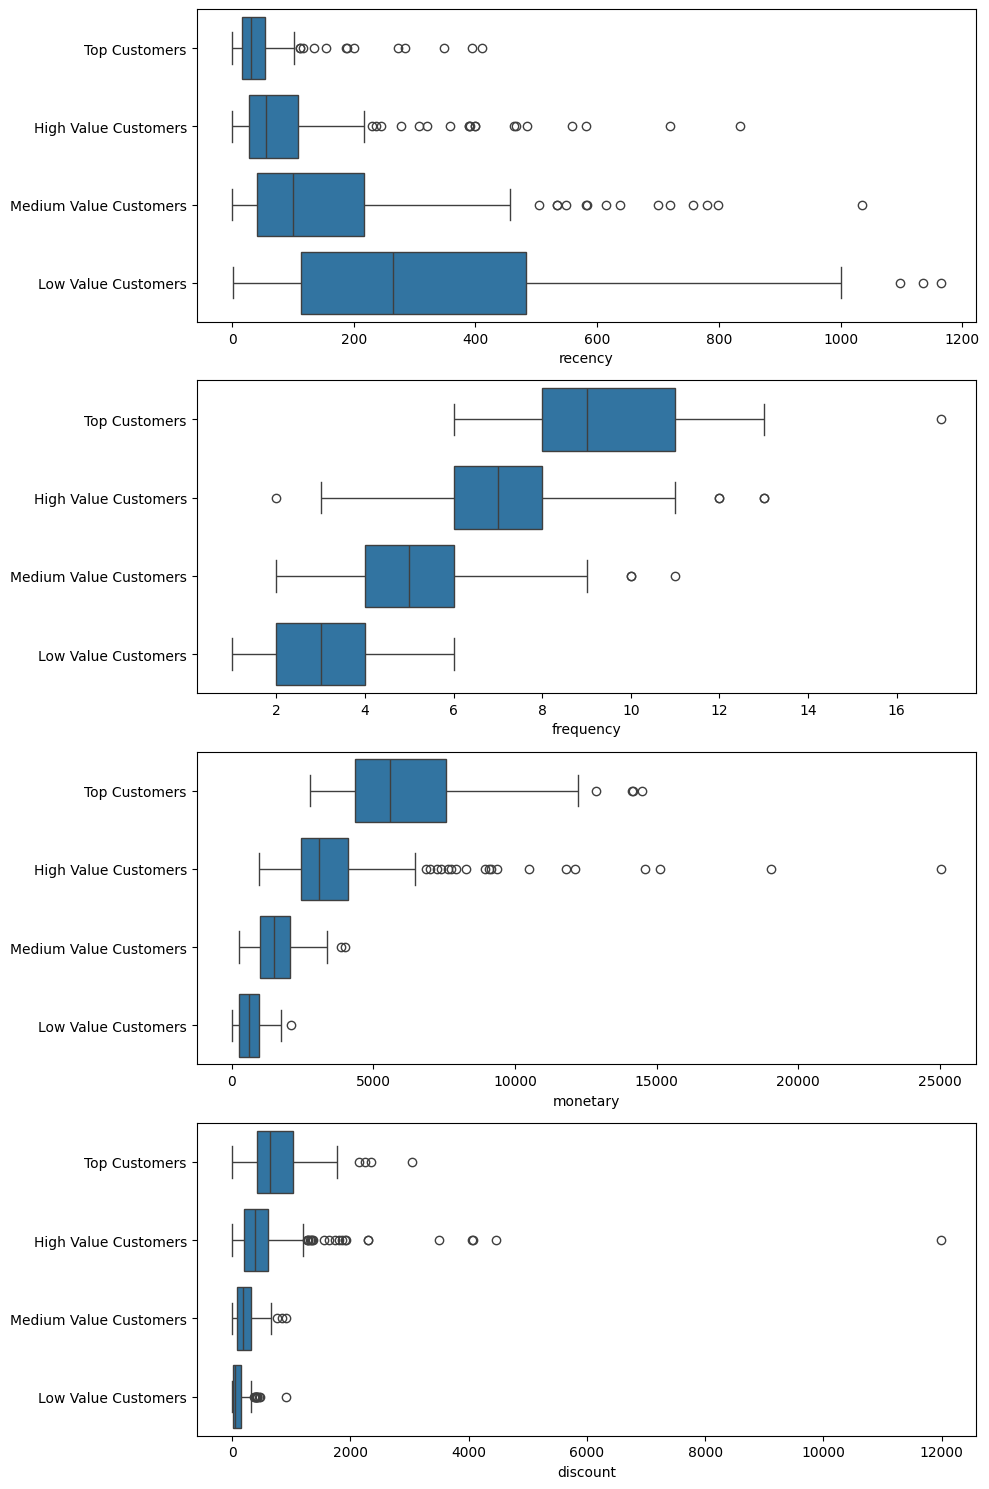

In [30]:
numerical_dis_plot(
    features=numerical,
    df=result_rfm_df,
    segment_feature="customer_segment")

Dari grafik di atas dapat disimpulkan semakin tinggi hirarki segmen (nilai rfm), semakin tinggi juga penggunaan nilai diskon. Maka diskon ini mungkin bisa menjadi daya tarik untuk mendorong kelompok high value customers untuk bertransaksi lebih banyak dan berubah menjadi top customers.

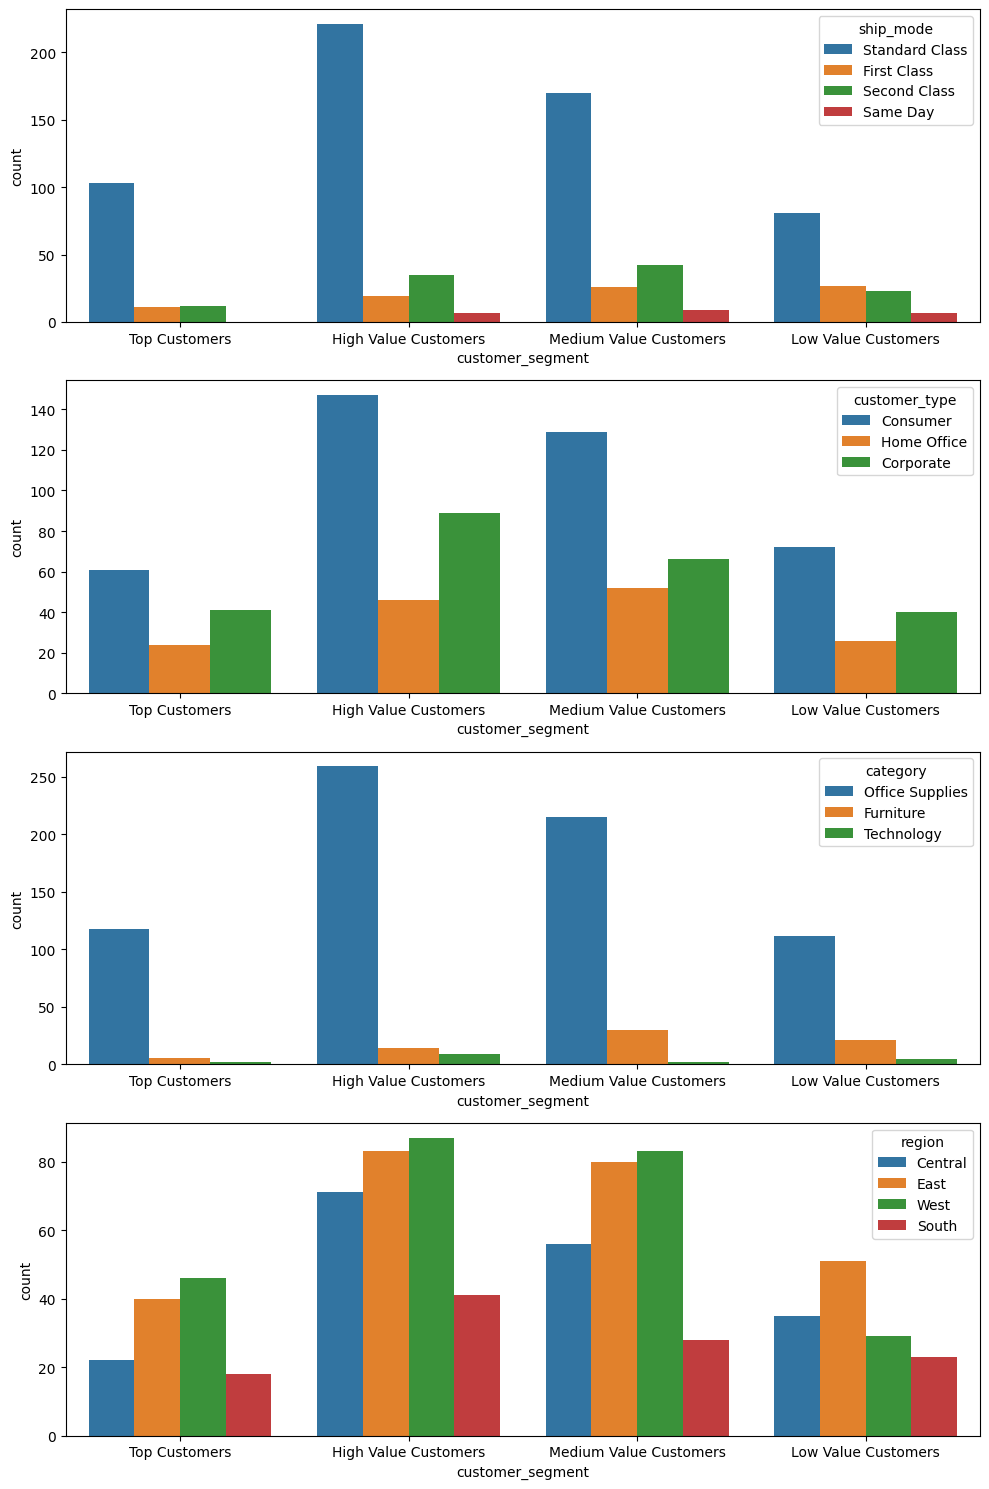

In [31]:
categorical_plot(
    features=categorical,
    df=result_rfm_df,
    segment_feature="customer_segment")

Nilainya sangat dipengaruhi oleh kelompok data yang dominan sehingga tidak dapat ditarik kesimpulan yang baik.

## **K-Means Clustering**

Karena algorima K-means clustering sangat sensitif terhadap outliers dan perbedaan skala data, maka sebelum melatih model kita lakukan transformasi data dengan metode yeo-johnson transformation dan standarisasi menggunakan power transform.

In [32]:
kmeans_df = main_df[["customer_id", "recency", "frequency", "monetary", "discount"]]
kmeans_df.head(5)

,customer_id,recency,frequency,monetary,discount
0,AA-10315,184,5,5563.560,1015.92800
1,AA-10375,19,9,1056.390,34.54400
2,AA-10480,259,4,1790.512,3.11040
3,AA-10645,55,6,5086.935,532.18395
4,AB-10015,415,3,886.156,12.26720


### Transformasi dan Standarisasi

In [33]:
features = ["recency", "frequency", "monetary", "discount"]

transformed_kmeans_df = kmeans_df.copy()
transformer = PowerTransformer(method='yeo-johnson', standardize=True)
transformer.fit(transformed_kmeans_df[features])
transformed_kmeans_df[features] = transformer.transform(transformed_kmeans_df[features])
transformed_kmeans_df.head()

,customer_id,recency,frequency,monetary,discount
0,AA-10315,0.701552,-0.459931,1.142958,1.325414
1,AA-10375,-0.994117,1.046277,-0.719477,-1.177057
2,AA-10480,0.996872,-0.893752,-0.220629,-1.993385
3,AA-10645,-0.257312,-0.053650,1.018462,0.675151
4,AB-10015,1.422079,-1.363189,-0.869587,-1.602655


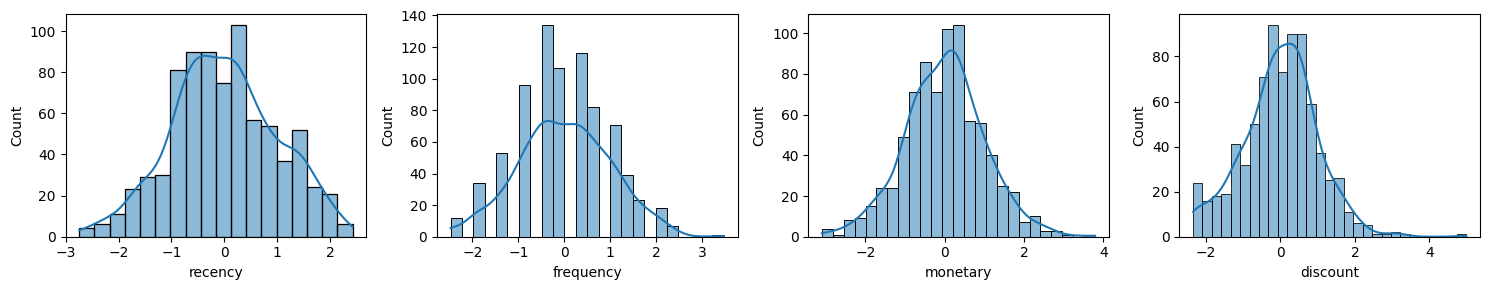

In [34]:
fig, ax = plt.subplots(1, len(features), figsize=(15, 3))
for i, col in enumerate(features):
  sns.histplot(data=transformed_kmeans_df, x=col, kde=True, ax=ax[i])
plt.tight_layout()
plt.show()

Oke sekarang distribusi datanya sudah mendekati normal.

###Optimalisasi Jumlah Cluster

Kemudian untuk menentukan jumlah cluster yang paling optimal, kita perlu melatih model K-means clustering dengan jumlah cluster yang berbeda-beda. Kemudian, kita evaluasi setiap model tersebut menggunakan metrik inertia (elbow method) dan silhouette coefficient.

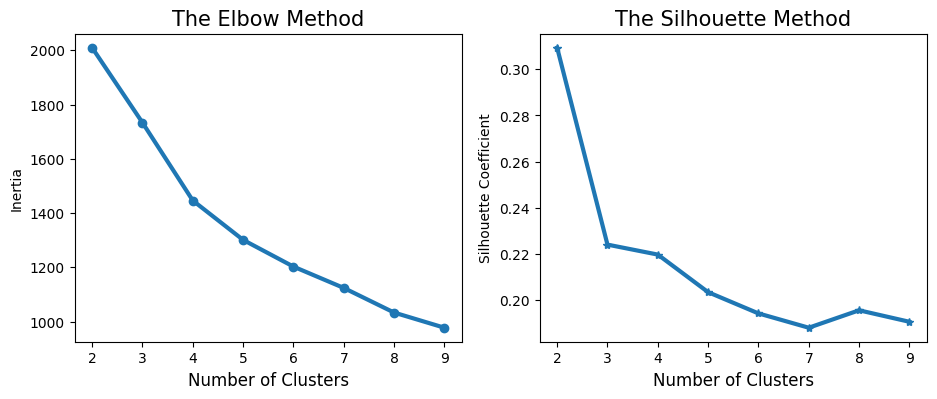

In [35]:
inertia = {}
silhouette = {}

for k in range(2,10):
    model = KMeans(n_clusters = k, random_state=42)
    model.fit(transformed_kmeans_df[features])
    inertia[k]= model.inertia_
    silhouette[k]= silhouette_score(transformed_kmeans_df[features], model.labels_)

fig, axs = plt.subplots(1,2, figsize = (11,4))
axs[0].plot(inertia.keys(), inertia.values(), marker = 'o', lw = 3)
axs[0].set_xlabel('Number of Clusters', fontsize = 12)
axs[0].set_ylabel('Inertia')
axs[0].set_title('The Elbow Method', fontsize = 15)

axs[1].plot(inertia.keys(), silhouette.values(), marker = '*' , lw = 3)
axs[1].set_xlabel('Number of Clusters', fontsize = 12)
axs[1].set_ylabel('Silhouette Coefficient')
axs[1].set_title('The Silhouette Method', fontsize = 15)

plt.show()

Berdasarkan kedua grafik diatas, jumlah cluster yang paling optimal adalah **4**. Dilihat dari perubahan nilai inertia yang paling signifikan atau titik number of cluster sebelum perubahan nilai inertia menjadi landai pada grafik elbow method yang mana biasanya membentuk siku/elbow. Dan diperkuat dengan grafik silhouette method yang mana semakin tinggi nilai silhouette coeffient-nya maka semakin baik pula pembagian segmen-nya.

### Modeling

In [36]:
K = 4

model = KMeans(n_clusters=K, random_state=75)
model.fit(transformed_kmeans_df[features])

KMeans(n_clusters=4, random_state=75)

In [37]:
transformed_kmeans_df['cluster'] = model.labels_.astype(str)
transformed_kmeans_df['cluster'] = pd.Categorical(transformed_kmeans_df['cluster'], ['0', '1', '2', '3'])
transformed_kmeans_df.head()

,customer_id,recency,frequency,monetary,discount,cluster
0,AA-10315,0.701552,-0.459931,1.142958,1.325414,0
1,AA-10375,-0.994117,1.046277,-0.719477,-1.177057,2
2,AA-10480,0.996872,-0.893752,-0.220629,-1.993385,3
3,AA-10645,-0.257312,-0.053650,1.018462,0.675151,0
4,AB-10015,1.422079,-1.363189,-0.869587,-1.602655,3


### Memvalidasi dan menganalisis hasil segmentasi

Kita manfaatkan snake plot untuk memahami perbedaan antar segmen.

In [38]:
df_melt = pd.melt(transformed_kmeans_df,
                  id_vars=['customer_id', 'cluster'],
                  value_vars=['recency', 'frequency', 'monetary', 'discount'],
                  var_name='metric',
                  value_name='value')
df_melt.head()

,customer_id,cluster,metric,value
0,AA-10315,0,recency,0.701552
1,AA-10375,2,recency,-0.994117
2,AA-10480,3,recency,0.996872
3,AA-10645,0,recency,-0.257312
4,AB-10015,3,recency,1.422079


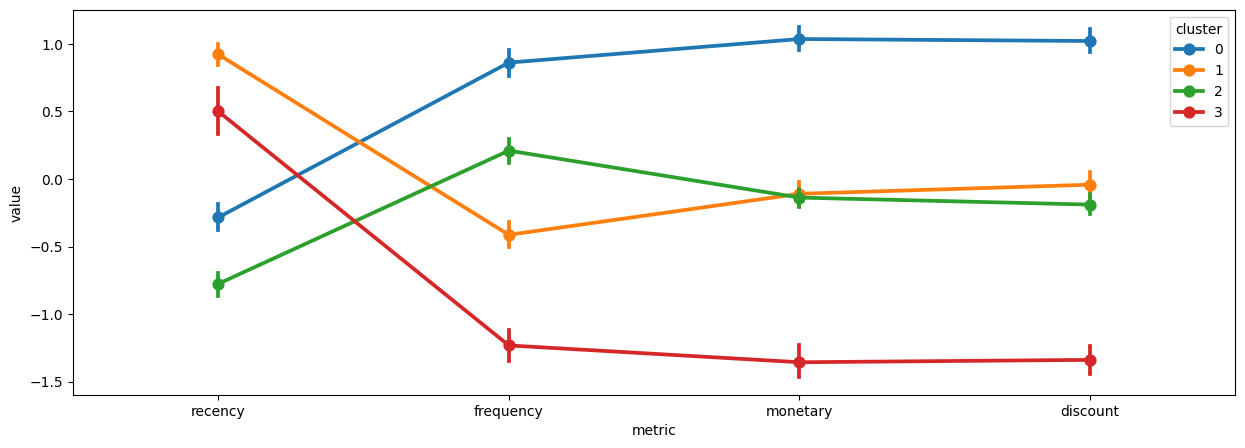

In [39]:
plt.figure(figsize=(15, 5))

sns.pointplot(data=df_melt, x='metric', y='value', hue='cluster')
plt.show()

Berikut beberapa poin yang dapat disimpulkan dari grafik di atas.

* Segmen 2 dan 0 merupakan kelompok pelanggan yang melakukan transaksi paling terkini.
* Segmen 0 dan 2 merupakan kelompok pelanggan yang paling sering melakukan transaksi.
* Berdasarkan feature monetery, segmen 0 merupakan kelompok pelanggan yang paling banyak menghasilkan revenue selanjutnya diikuti oleh segmen 1 dan 2.
* Berdasarkan penggunaan discount, segmen 0 merupakan kelompok pelanggan yang paling banyak menggunakan discount dan yang terendah ialah segmen 3.

Berdasarkan kesimpulan diatas kita beri label untuk setiap segmennya, dengan segmen 0 adalah top customers, segmen 1 adalah medium value customers, segmen 2 adalah high value customers, dan segmen 3 adalah low value customers.

In [40]:
transformed_kmeans_df['cluster'] = transformed_kmeans_df['cluster'].cat.rename_categories(['Top Customers', 'Medium Value Customers', 'High Value Customers', 'Low Value Customers'])
transformed_kmeans_df['cluster'] = pd.Categorical(transformed_kmeans_df['cluster'], ['Top Customers', 'High Value Customers', 'Medium Value Customers', 'Low Value Customers'])
transformed_kmeans_df.head()

,customer_id,recency,frequency,monetary,discount,cluster
0,AA-10315,0.701552,-0.459931,1.142958,1.325414,Top Customers
1,AA-10375,-0.994117,1.046277,-0.719477,-1.177057,High Value Customers
2,AA-10480,0.996872,-0.893752,-0.220629,-1.993385,Low Value Customers
3,AA-10645,-0.257312,-0.053650,1.018462,0.675151,Top Customers
4,AB-10015,1.422079,-1.363189,-0.869587,-1.602655,Low Value Customers


Berikut ini jumlah setiap segmennya:

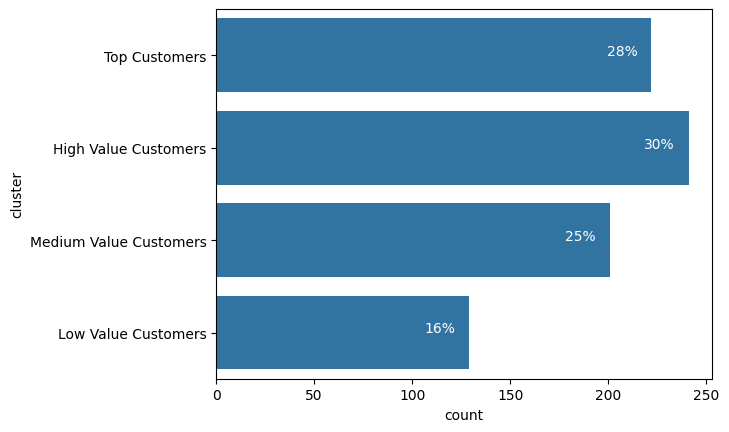

In [41]:
ax = sns.countplot(data=transformed_kmeans_df, y='cluster')
for p in ax.patches:
    ax.text(p.get_width() - 15,
            p.get_y() + p.get_height()/2,
            f'{100 * p.get_width() / len(transformed_kmeans_df):.0f}%',
            ha="center",
            color='white')
plt.show()

## Summary

| Segmen | Label | % | Interpretasi | Actionable Insight |
| --- | --- | --- | --- | --- |
| 0 | Top Customers | 28% | Pelanggan yang sangat loyal, cenderung melakukan transaksi dalam jumlah besar, dan sering memanfaatkan discount, segmen ini yang paling banyak menghasilkan revenue. | Fokus pada peningkatkan pembelian pelanggan, untuk itu penting untuk melakukan strategi cross selling ataupun up selling. |
| 1 | Medium Value Customers | 25% | Pelanggan yang jarang melakukan transaksi, terakhir melakukan pembelian juga sudah sangat lama, namun menghasilkan revenue yang cukup besar, dan sering memanfaatkan discount. | Segmen ini rentan untuk berhenti berlangganan (churn), maka sebaiknya fokus untuk mengaktivasi mereka agar kembali melakukan pembelian dengan merancang Reactivation Strategy dan Retention Strategy. |
| 2 | High Value Customers | 30% | Pelanggan yang sering melakukan transaksi dan memiliki potensi sangat besar untuk menjadi 'top customers'. Merupakan customer yang melakukan pembelian paling terkini, dan sering melakukan pembelian, cukup banyak menghasilkan revenue, namun jarang menggunakan discount. | Tim bisnis perlu mengoptimasi sumber daya kampanye pemasaran untuk segmen ini untuk menjaga loyalitas dan meningkatkan nilai mereka sehingga dapat berubah menjadi top customer. |
| 3 | Low Value Customers | 16% | Pelanggan yang paling jarang melakukan transaksi, terakhir melakukan pembelian sudah cukup lama dan menghasilkan revenue paling sedikit, serta sangat jarang menggunakan discount. | Ini merupakan segmen bernilai rendah, oleh karena itu lebih baik sumber daya dialokasikan untuk melakukan kampanye pemasaran pada segmen lain sehingga sumber daya dapat dimanfaatkan secara efisien. |